<a href="https://colab.research.google.com/github/Saleti-Thrinadh-3/Machine-Learning/blob/main/Logistic_Regression_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
#read diabetes csv file

In [ ]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [233]:
#to check the any null values are occured or not
df.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [ ]:
#to knowing about all the features and it's datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#to check the how many rows and columns are in the dataset
df.shape

(768, 9)

In [234]:
#show the basic values of the dataset columns like mean,count,min,max etc...
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#to show the particular value for the column
df.describe().loc['mean']

pregnancies      3.845052
glucose        120.894531
diastolic       69.105469
triceps         20.536458
insulin         79.799479
bmi             31.992578
dpf              0.471876
age             33.240885
diabetes         0.348958
Name: mean, dtype: float64

<Axes: >

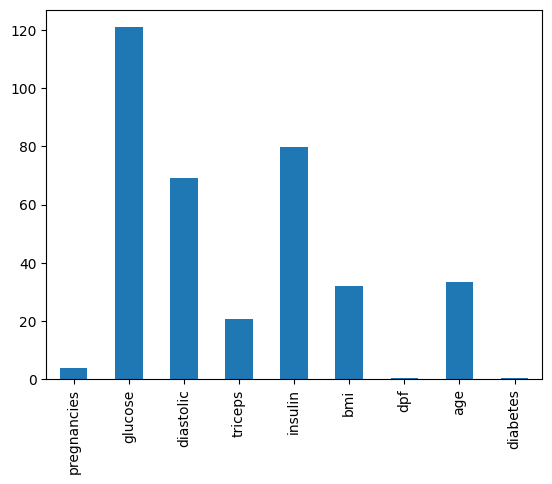

In [ ]:
df.describe().loc['mean'].plot.bar()
#to show mean values in bar graph

<Axes: >

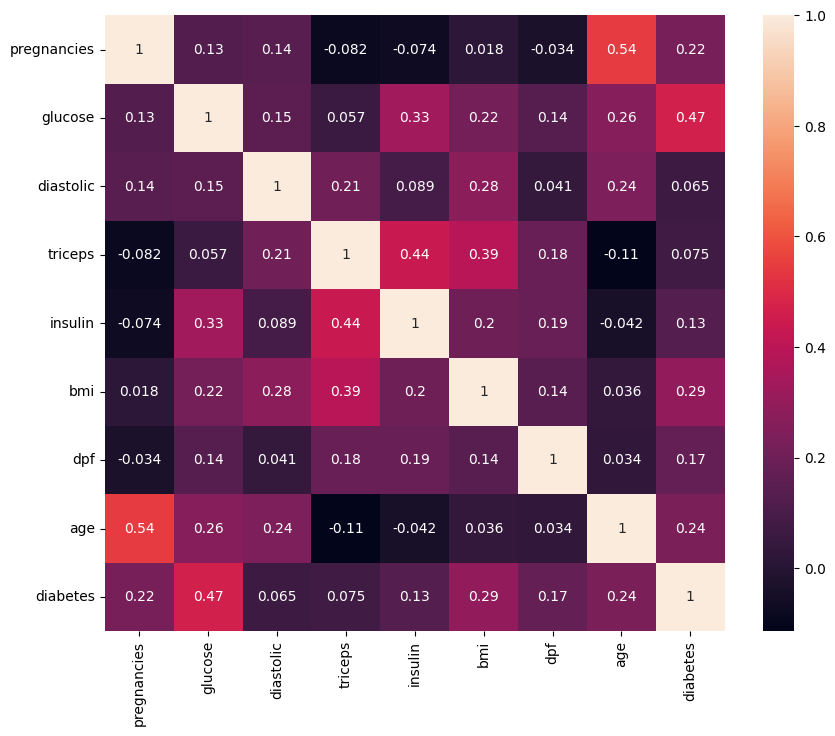

In [ ]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True)
#the R&D Spend is more effect for output

<ipython-input-213-8909f1abb6a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['diabetes'],bins=5)


<Axes: xlabel='diabetes', ylabel='Density'>

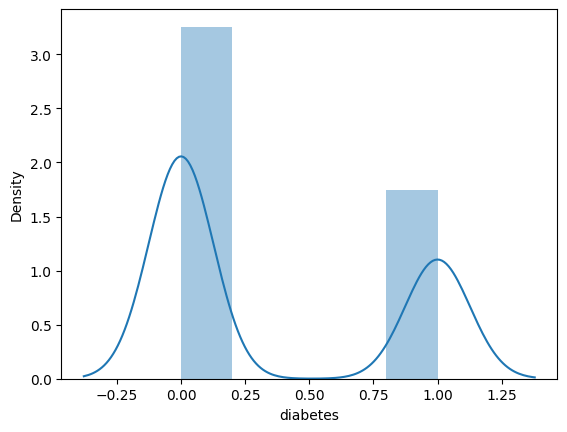

In [ ]:
#to display the distplot using seaborn
sb.distplot(df['diabetes'],bins=5)

In [ ]:
#split the features for x and y 
x=df.drop('diabetes',axis=1).values
y=df['diabetes'].values
#reshape into 2D array
y=y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
#to split into trained data and test data for both x ands y
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.31,random_state=13)

In [ ]:
xtrain.shape,xtest.shape

((529, 8), (239, 8))

In [ ]:
ytrain.shape

(529, 1)

In [ ]:
#fit or train the model using logistic regression
ml=LogisticRegression(C=0.5)
ml.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [ ]:
ml.classes_

array([0, 1])

In [ ]:
ml.intercept_

array([-7.77909772])

In [ ]:
ml.coef_

array([[ 0.13214636,  0.03537715, -0.0123005 , -0.00403592, -0.0009561 ,
         0.0851449 ,  0.45582864,  0.00653258]])

In [ ]:
#predict the probability of xtrain data
ml.predict_proba(xtrain)

array([[0.89823503, 0.10176497],
       [0.90860886, 0.09139114],
       [0.81877069, 0.18122931],
       ...,
       [0.94515873, 0.05484127],
       [0.86218824, 0.13781176],
       [0.2569316 , 0.7430684 ]])

In [ ]:
#predict the results for trained data 
ypred=ml.predict(xtrain)

In [ ]:
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

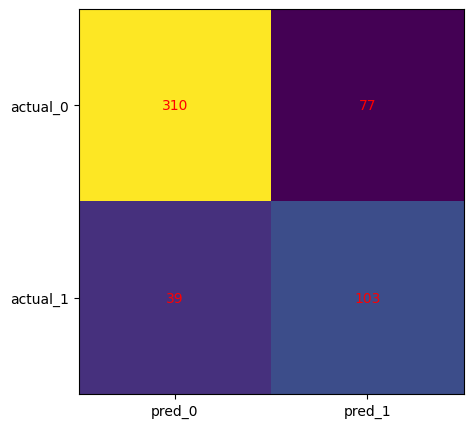

In [236]:
#display the confusion matrics for trained
cm=confusion_matrix(ytrain,ypred)
fig,pl=plt.subplots(figsize=(5,5))
pl.imshow(cm)
pl.grid(False)
pl.xaxis.set(ticks=(0,1),ticklabels=('pred_0','pred_1'))
pl.yaxis.set(ticks=(0,1),ticklabels=('actual_0','actual_1'))
pl.set_ylim(1.5,-0.5)
for i in range(2):
  for(j) in range(2):
    pl.text(i,j,cm[i,j],ha='center',va='center',color='red')

In [ ]:
#to display the classification report for trained data
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       349
           1       0.73      0.57      0.64       180

    accuracy                           0.78       529
   macro avg       0.76      0.73      0.74       529
weighted avg       0.78      0.78      0.77       529



In [ ]:
#accuracy for trained data
ml.score(xtrain,ytrain)

0.780718336483932

In [ ]:
ypred1 = ml.predict(xtest)

In [ ]:
#predict the results for test data
ypred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

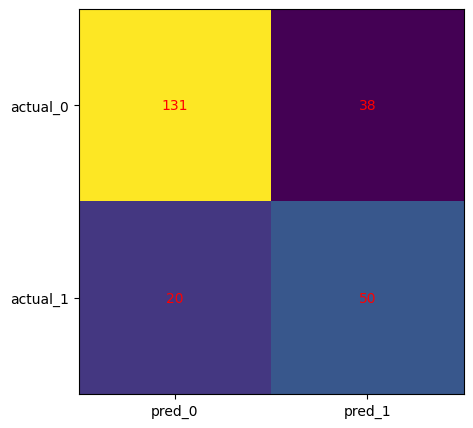

In [ ]:
#display the confusion matrics for tested data
cm1=confusion_matrix(ytest,ypred1)
fig,pl=plt.subplots(figsize=(5,5))
pl.imshow(cm1)
pl.grid(False)
pl.xaxis.set(ticks=(0,1),ticklabels=('pred_0','pred_1'))
pl.yaxis.set(ticks=(0,1),ticklabels=('actual_0','actual_1'))
pl.set_ylim(1.5,-0.5)
for i in range(2):
  for(j) in range(2):
    pl.text(i,j,cm1[i,j],ha='center',va='center',color='red')

In [ ]:
#to display the classification report for trained data
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.71      0.57      0.63        88

    accuracy                           0.76       239
   macro avg       0.74      0.72      0.73       239
weighted avg       0.75      0.76      0.75       239



In [ ]:
#accuracy for trained data
ml.score(xtest,ytest)

0.7573221757322176